### 발전설비
- 지역별 설비 현황과 발전량의 상관성 파악
- 실제로 신재생 발전이 가능한 인프라가 얼마나 구축되었는지 그리고 현실적인 공급량 

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')       
plt.rcParams['axes.unicode_minus'] = False

#지역별 발전 설비
df_gen = pd.read_csv('../Data/HOME_발전설비_연료원별.csv',encoding='cp949', header=0 )
df_market = pd.read_csv('../Data/HOME_전력거래_시장참여설비용량(전력시장·PPA)_연료원별.csv',encoding='cp949')
df_contract = pd.read_excel('../Data/신재생에너지 계약 현황 목록.xlsx')

#### 전처리

In [213]:
# df_gen 전처리 (HOME_발전설비_연료원별)

# 1. 컬럼명 정의
df_gen.columns = ['기간', '회원구분', '급전방식', '사업구분', '지역', '원자력', '유연탄', '무연탄', '유류', 'LNG',
                  '양수', '연료전지', '석탄가스화', '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '기타', '합계']

# 2. 첫 번째 행 제거 (헤더 중복일 경우)
df_gen = df_gen.iloc[1:].reset_index(drop=True)

# 3. '지역' 컬럼이 '소계'인 행 제거
df_gen = df_gen[~df_gen['지역'].isin(['소계'])].reset_index(drop=True)



# 4. 숫자형 컬럼 변환
numeric_columns = ['원자력', '유연탄', '무연탄', '유류', 'LNG', '양수', '연료전지', '석탄가스화',
                   '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '기타', '합계']

for col in numeric_columns:
    df_gen[col] = pd.to_numeric(df_gen[col], errors='coerce')

# 5. 기간 컬럼 처리 (예: Apr-25 형식일 경우)
df_gen['기간'] = pd.to_datetime(df_gen['기간'], format='%Y/%m', errors='coerce')

# 6. 불필요한 컬럼 제거
df_gen = df_gen.drop(['회원구분', '급전방식', '사업구분'], axis=1)

# 7. 결측치 처리
df_gen = df_gen.fillna(0)

print(df_gen.head())




          기간  지역     원자력     유연탄  무연탄     유류       LNG   양수     연료전지  석탄가스화  \
0 2025-04-01  서울     0.0     0.0  0.0   0.00   802.346  0.0   87.230    0.0   
1 2025-04-01  부산  4550.0    19.0  0.0   0.00  1845.836  0.0   40.480    0.0   
2 2025-04-01  대구     0.0    72.9  0.0   0.00   640.700  0.0    4.110    0.0   
3 2025-04-01  인천     0.0  5080.0  0.0  36.23  8576.747  0.0  265.105    0.0   
4 2025-04-01  광주     0.0     0.0  0.0   0.00   115.246  0.0   21.035    0.0   

          태양광      풍력      수력   해양     바이오  폐기물     기타            합계  
0   47.804115   0.000   0.000  0.0   5.800  0.0  27.95    971.130115  
1  275.201300   0.762   0.020  0.0   4.574  0.0  33.90   6769.773300  
2  390.474086   0.000   3.560  0.0   3.000  0.0   9.90   1124.644086  
3  181.415635  49.000  12.599  0.0  76.330  0.0  30.78  14308.206635  
4  361.414001   0.000   1.830  0.0   2.120  0.0   3.96    505.605001  


In [214]:
# df_market 전처리 (HOME_전력거래_시장참여설비용량(전력시장·PPA)_연료원별)

# 1. 컬럼명 정의
df_market.columns = ['기간', '지역', '원자력', '유연탄', '무연탄','석탄 합계', '유류', 'LNG', '양수', '연료전지', '석탄가스화', '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '신재생 합계', '기타', '합계']

# 2. 첫 번째 행 제거 (헤더 중복일 경우)
df_market = df_market.iloc[1:].reset_index(drop=True)

# 3. '지역' 컬럼이 '소계'인 행 제거
df_market = df_market[~df_market['지역'].isin(['소계'])].reset_index(drop=True)



# 4. 숫자형 컬럼 변환
numeric_columns = ['원자력', '유연탄', '무연탄', '유류', 'LNG', '양수', '연료전지', '석탄가스화',
                   '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '기타']

for col in numeric_columns:
    df_market[col] = pd.to_numeric(df_market[col], errors='coerce')

# 5. 기간 컬럼 처리 (예: Apr-25 형식일 경우)
df_market['기간'] = pd.to_datetime(df_market['기간'], format='%Y/%m', errors='coerce')

# 6. 결측치 처리
df_market = df_market.fillna(0)

print(df_market.head())

          기간  지역     원자력     유연탄  무연탄 석탄 합계   유류       LNG   양수    연료전지  \
0 2025-03-01  서울     0.0     0.0    0     0  0.0   850.428  0.0   86.63   
1 2025-03-01  부산  4550.0    19.0    0    19  0.0  1895.986  0.0   40.48   
2 2025-03-01  대구     0.0    72.9    0  72.9  0.0   685.000  0.0    3.90   
3 2025-03-01  인천     0.0  5080.0    0  5080  0.0  8597.147  0.0  265.00   
4 2025-03-01  광주     0.0     0.0    0     0  0.0   115.246  0.0   20.72   

   석탄가스화      태양광     풍력      수력   해양     바이오    폐기물              신재생 합계  \
0    0.0   18.488   0.00   0.000  0.0   6.865  32.95             144.933   
1    0.0  147.520   0.75   0.000  0.0   5.069  39.70  233.51899999999992   
2    0.0  113.791  11.55   4.060  0.0   3.000  15.60  151.90099999999998   
3    0.0   64.174  49.00  12.599  0.0  68.360  33.68  492.81300000000005   
4    0.0   80.542   0.00   1.830  0.0   2.120   1.26             106.472   

     기타         합계  
0  0.00    995.361  
1  0.00   6698.505  
2  0.00    909.801  
3  7.97 

In [215]:
# df_contract 전처리 (신재생에너지 계약 현황 목록)

# 1. 컬럼명 정리
df_contract.columns = ['발전원', '지역구분', '시도구분', '개수', '용량', '지역개수', '지역용량', '연도']

# 2. 첫 번째 행(헤더) 제거
df_contract = df_contract.iloc[1:].reset_index(drop=True)

# 3. 결측치 처리
df_contract = df_contract.fillna(0)

# 4. 숫자형 컬럼 변환
numeric_columns = ['개수', '용량', '지역개수', '지역용량', '연도']

for col in numeric_columns:
    # 특수 문자열 처리
    df_contract[col] = df_contract[col].replace(['5호미만제거', '소계', '합계'], '0')
    # 문자열인 경우에만 쉼표 제거
    if df_contract[col].dtype == 'object':
        df_contract[col] = df_contract[col].str.replace(',', '')
    # 숫자형 변환
    df_contract[col] = pd.to_numeric(df_contract[col], errors='coerce')

# 5. 결측치 처리
df_market = df_market.fillna(0)

print(df_contract.head())



   발전원     지역구분 시도구분   개수        용량    지역개수       지역용량    연도
0  태양광  강원특별자치도  강릉시  120  10046.06  1420.0  163529.16  2024
1  태양광  강원특별자치도  고성군  116  11968.60  1420.0  163529.16  2024
2  태양광  강원특별자치도  동해시   10    572.25  1420.0  163529.16  2024
3  태양광  강원특별자치도  삼척시   34  10617.11  1420.0  163529.16  2024
4  태양광  강원특별자치도  속초시   10    619.97  1420.0  163529.16  2024


### 1. 지역별 태양광, 풍력 등 신재생 설비 구축 비중 및 변화 추이 분석

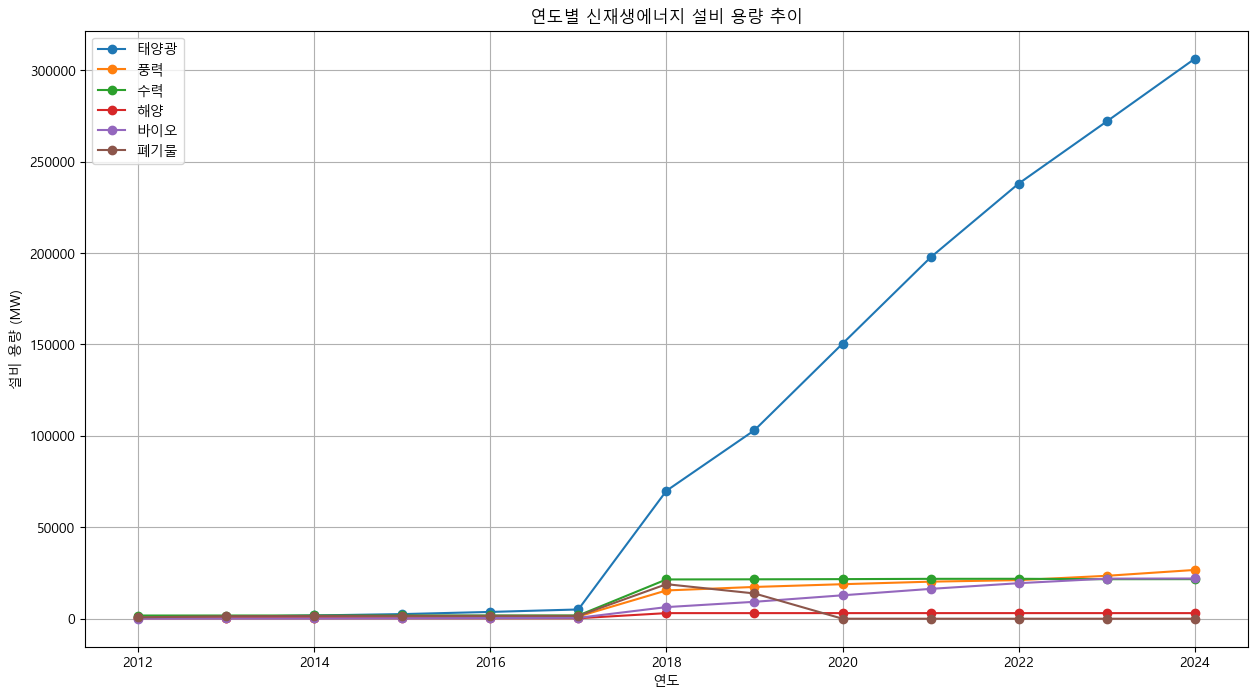

In [232]:
# 연도별 신재생에너지 설비 용량 추이 분석

# 2025년 제외하고 2024년 12월까지 데이터 필터링
df_gen_filtered = df_gen[df_gen['기간'].dt.year <= 2024]

yearly_renewable = df_gen_filtered.groupby(df_gen_filtered['기간'].dt.year)[['태양광', '풍력', '수력', '해양', '바이오', '폐기물']].sum()


# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for col in ['태양광', '풍력', '수력', '해양', '바이오', '폐기물']:
    plt.plot(yearly_renewable.index, yearly_renewable[col], label=col, marker='o')
plt.title('연도별 신재생에너지 설비 용량 추이')
plt.xlabel('연도')
plt.ylabel('설비 용량 (MW)')
plt.legend()
plt.grid(True)
plt.show()

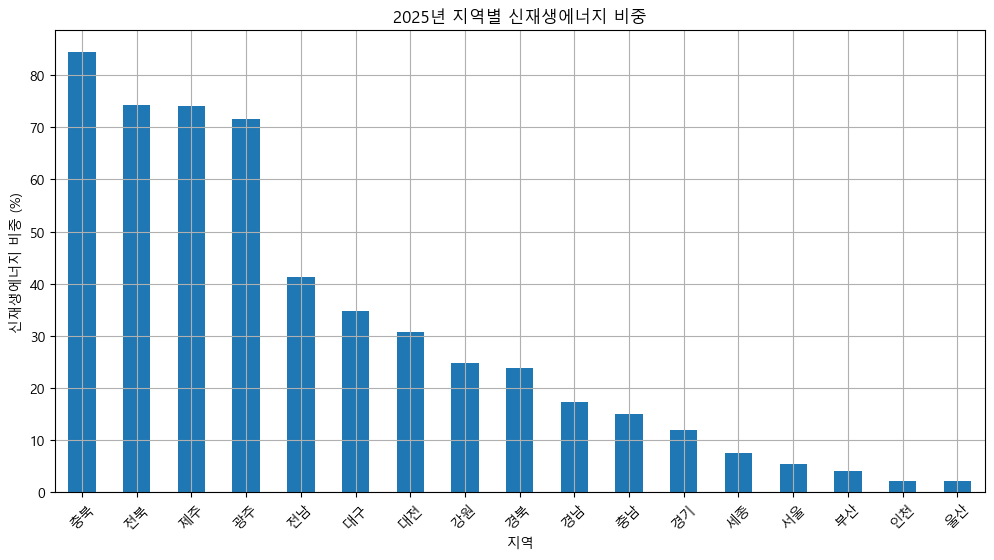

In [234]:
# 최근 연도의 지역별 신재생에너지 비중 분석
latest_year = df_gen['기간'].dt.year.max()
latest_data = df_gen[df_gen['기간'].dt.year == latest_year]

# 지역별 신재생에너지 비중 계산
renewable_ratio = latest_data.groupby('지역').apply(
    lambda x: (x[['태양광', '풍력', '수력', '해양', '바이오', '폐기물']].sum().sum() / x['합계'].sum()) * 100
).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
renewable_ratio.plot(kind='bar')
plt.title(f'{latest_year}년 지역별 신재생에너지 비중')
plt.xlabel('지역')
plt.ylabel('신재생에너지 비중 (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1500x800 with 0 Axes>

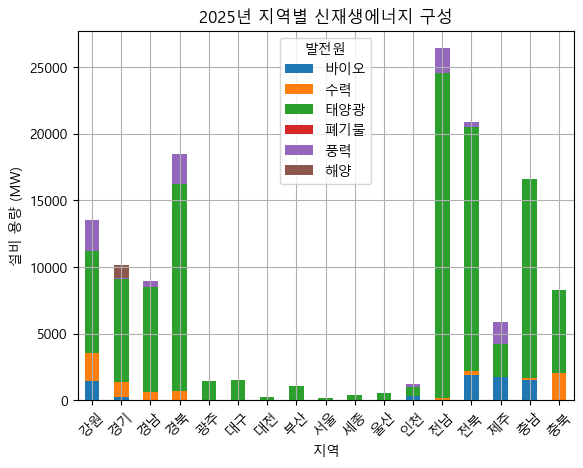

In [226]:
# 지역별 발전원 구성 분석
latest_data_pivot = latest_data.pivot_table(
    index='지역',
    values=['태양광', '풍력', '수력', '해양', '바이오', '폐기물'],
    aggfunc='sum'
)

# 시각화
plt.figure(figsize=(15, 8))
latest_data_pivot.plot(kind='bar', stacked=True)
plt.title(f'{latest_year}년 지역별 신재생에너지 구성')
plt.xlabel('지역')
plt.ylabel('설비 용량 (MW)')
plt.legend(title='발전원')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

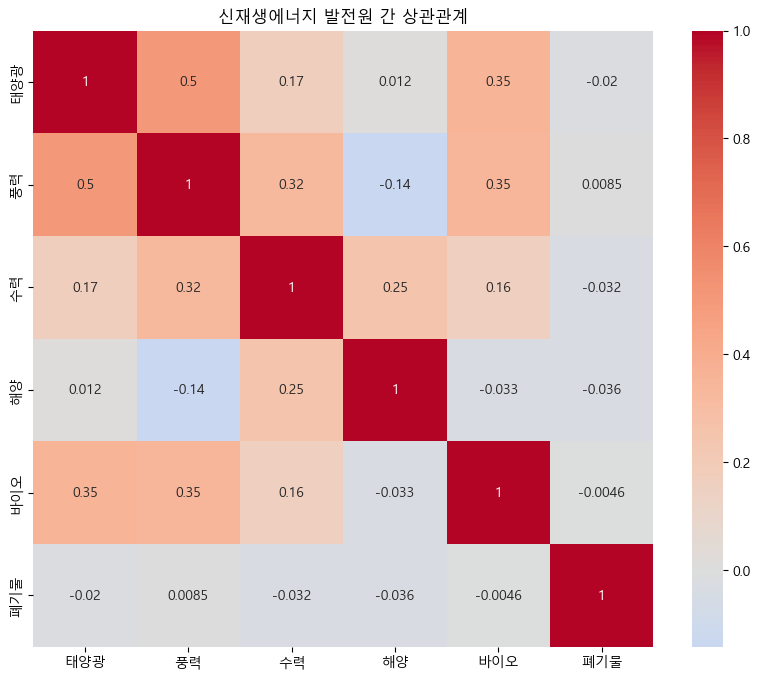

In [219]:
# 신재생에너지 발전원 간의 상관관계 분석
renewable_corr = df_gen[['태양광', '풍력', '수력', '해양', '바이오', '폐기물']].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(renewable_corr, annot=True, cmap='coolwarm', center=0)
plt.title('신재생에너지 발전원 간 상관관계')
plt.show()

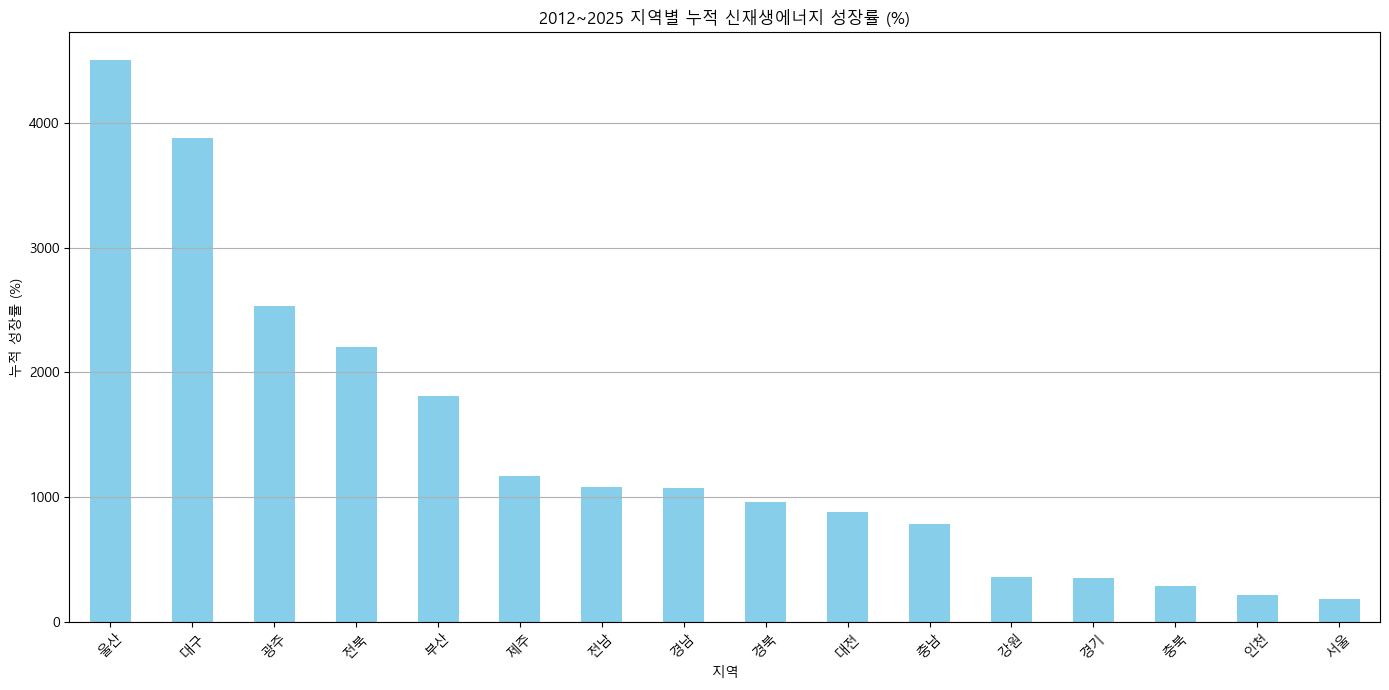

In [ ]:
# 지역별 누적 신재생에너지 성장률

import pandas as pd
import matplotlib.pyplot as plt

# 연도별 지역별 신재생에너지 합계 계산
yearly_by_region = df_gen.groupby(['기간', '지역'])[['태양광', '풍력', '수력', '해양', '바이오', '폐기물']].sum()
yearly_by_region['총신재생'] = yearly_by_region.sum(axis=1)

# 초기 연도와 마지막 연도의 설비용량 비교 (누적 성장률 계산)
first_year = yearly_by_region.index.get_level_values('기간').min()
last_year = yearly_by_region.index.get_level_values('기간').max()

# 각 연도별 데이터 추출
initial = yearly_by_region.xs(first_year, level='기간')
latest = yearly_by_region.xs(last_year, level='기간')

# 공통 지역만 추출
common_regions = initial.index.intersection(latest.index)
initial = initial.loc[common_regions]
latest = latest.loc[common_regions]

# 유효한 데이터(0 또는 결측치 제거)
valid = (initial['총신재생'] > 0) & initial['총신재생'].notna() & latest['총신재생'].notna()
initial = initial[valid]
latest = latest[valid]

# 누적 성장률 계산
growth_rate_cum = ((latest['총신재생'] - initial['총신재생']) / initial['총신재생']) * 100

# 시각화
plt.figure(figsize=(14, 7))
growth_rate_cum.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'{first_year.strftime("%Y")}~{last_year.strftime("%Y")} 지역별 누적 신재생에너지 성장률 (%)')
plt.xlabel('지역')
plt.ylabel('누적 성장률 (%)')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



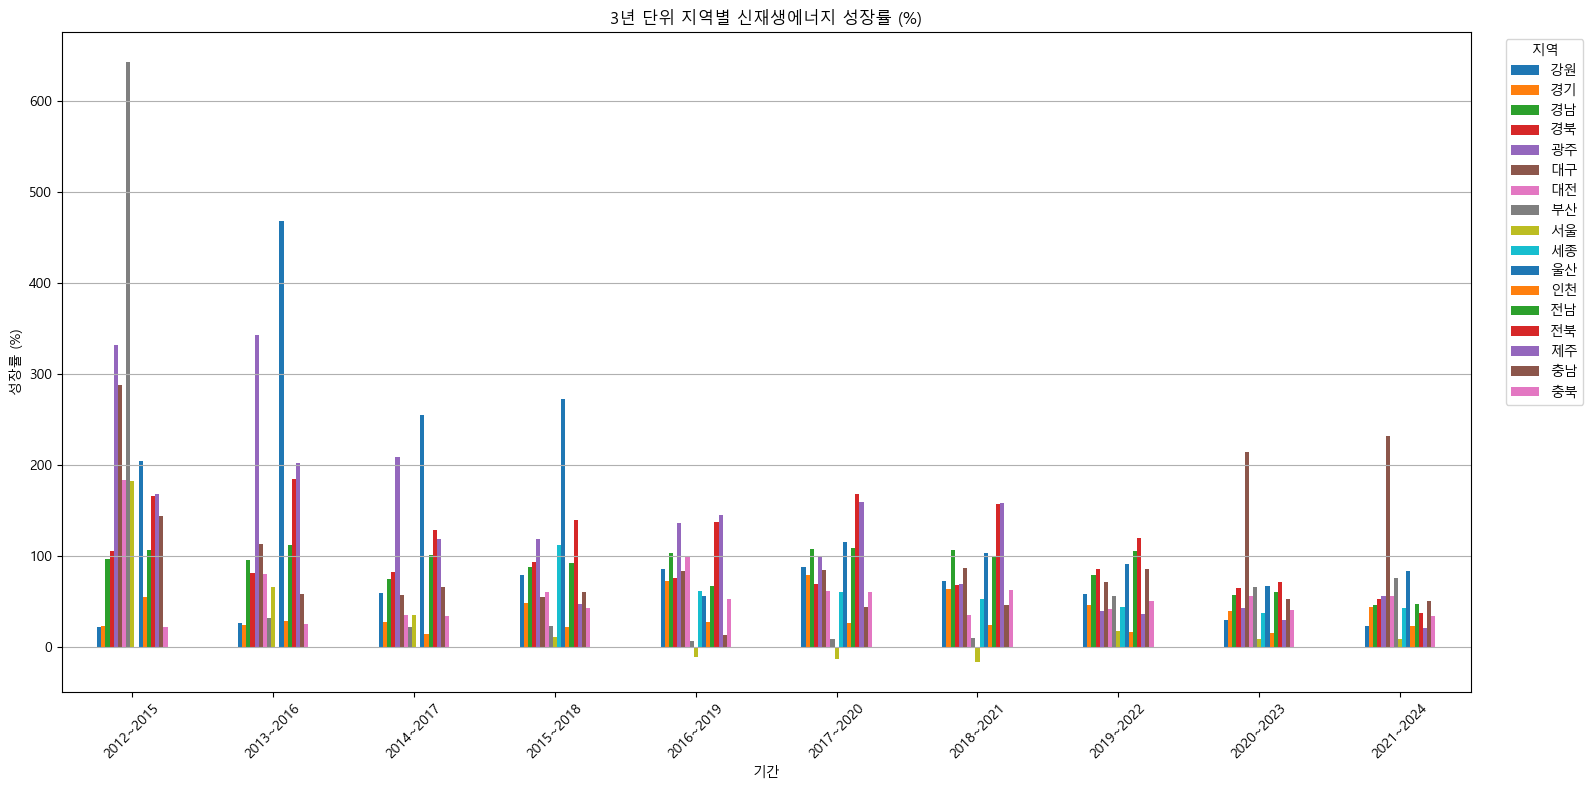

In [ ]:
# 지역별 3년 단위 신재생에너지 성장률

# 12월 1일 기준 데이터만 추출
yearly_snapshots = yearly_by_region.loc[yearly_by_region.index.get_level_values('기간').isin(
    pd.date_range('2012-12-01', '2025-04-01', freq='12MS')
)]

# 3년 단위 성장률 계산
growth_by_period = {}

years = sorted(yearly_snapshots.index.get_level_values('기간').unique())

for i in range(len(years) - 3):
    start = years[i]
    end = years[i + 3]

    try:
        start_data = yearly_snapshots.xs(start, level='기간')
        end_data = yearly_snapshots.xs(end, level='기간')
    except KeyError:
        continue

    # 공통 지역만 비교
    common_regions = start_data.index.intersection(end_data.index)
    if len(common_regions) == 0:
        continue

    start_vals = start_data.loc[common_regions, '총신재생']
    end_vals = end_data.loc[common_regions, '총신재생']

    valid = (start_vals > 0) & (end_vals.notna())
    start_vals = start_vals[valid]
    end_vals = end_vals[valid]

    if len(start_vals) == 0:
        continue

    growth = ((end_vals - start_vals) / start_vals) * 100
    period_label = f"{start.year}~{end.year}" 
    growth_by_period[period_label] = growth

# 데이터프레임 변환 및 시각화
growth_df = pd.DataFrame(growth_by_period).T
growth_df = growth_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

if not growth_df.empty:
    growth_df.plot(kind='bar', figsize=(16, 8))
    plt.title('3년 단위 지역별 신재생에너지 성장률 (%)')
    plt.xlabel('기간')
    plt.ylabel('성장률 (%)')
    plt.xticks(rotation=45)
    plt.legend(title='지역', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("유효한 성장률 데이터가 없습니다.")


### 2. 발전설비 용량과 실제 발전량 비교 → 설비 효율성 검토


[설비 효율성 분석 결과]
지역
제주    288.694486
부산    264.417916
강원    253.783316
충남    250.747396
대구    250.588895
경기    247.235810
경북    246.316952
인천    245.782299
전남    243.950713
세종    243.396503
경남    242.096592
전북    239.291447
서울    235.643943
광주    222.670902
울산    217.149223
충북    194.917626
대전     94.011587
Name: 평균이용률(%), dtype: float64


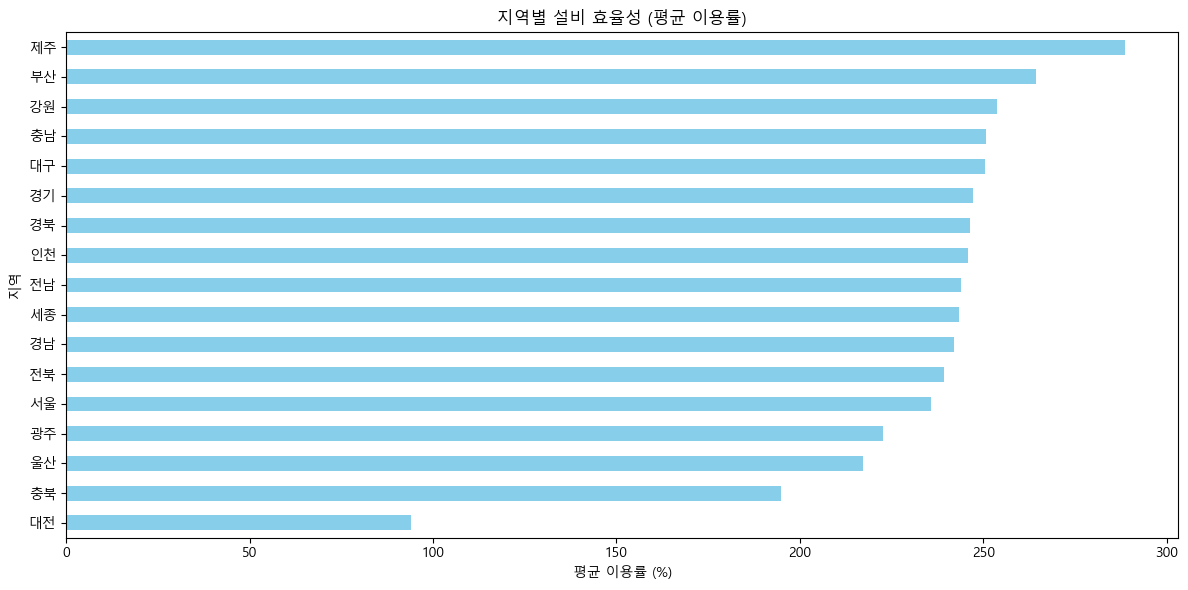

In [221]:
# 2번 주제: 발전설비 용량과 실제 발전량 비교 → 설비 효율성 검토

# 1. 데이터 준비
df_gen['기간'] = pd.to_datetime(df_gen['기간'])
df_market['기간'] = pd.to_datetime(df_market['기간'])
latest_year = df_gen['기간'].dt.year.max()

renewable_cols = ['태양광', '풍력', '수력', '해양', '바이오', '폐기물']

# 2. 지역별 연간 평균 설비, 총 발전량
capacity_data = df_gen[df_gen['기간'].dt.year == latest_year].groupby('지역')[renewable_cols].mean()
generation_data = df_market[df_market['기간'].dt.year == latest_year].groupby('지역')[renewable_cols].sum()

# 3. 0 → NaN 처리 후 효율 계산
capacity_data = capacity_data.replace(0, np.nan)
efficiency = (generation_data / capacity_data) * 100
efficiency = efficiency.fillna(0)

# 4. 효율성 계산 (평균 이용률)
efficiency['평균이용률(%)'] = efficiency.replace(0, np.nan).mean(axis=1).fillna(0)

# 5. 효율성 출력
print("\n[설비 효율성 분석 결과]")
print(efficiency['평균이용률(%)'].sort_values(ascending=False))

# 6. 효율성 시각화 (바 차트)
plt.figure(figsize=(12, 6))
efficiency['평균이용률(%)'].sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("지역별 설비 효율성 (평균 이용률)")
plt.xlabel("평균 이용률 (%)")
plt.ylabel("지역")
plt.tight_layout()
plt.show()



분석 결과:각 지역별 신재생에너지 발전 설비의 효율성 해석

+ 효율성이 **높은 지역(제주, 부산 등)** 은 발전설비가 잘 운영되고, 신재생에너지 자원의 활용도가 높다는 것을 의미한다.

+ 반면, **효율성이 낮은 지역(대전, 서울 등)* 은 설비 운영 효율이 떨어지거나, 설비 용량에 비해 발전량이 부족한 상황일 수 있습니다. 이런 지역은 효율성을 높이기 위한 정책적 개선이 필요할 수 있다.


제주:
**효율성 288.69%** 로 가장 높은 값. 이는 제주 지역이 신재생에너지 설비 용량에 비해 발전량이 매우 효율적으로 이루어지고 있음을 나타낸다. 제주가 풍력이나 태양광 등 신재생에너지 자원의 활용도가 매우 높다는 것을 시사할 수 있다.


부산:
**효율성 264.42%** 로 두 번째로 높은 효율성을 기록. 부산은 해양 에너지나 태양광 등의 에너지 효율이 좋을 수 있으며, 신재생에너지 자원의 활용이 매우 뛰어난 것으로 볼 수 있다.


강원, 충남, 대구 등:
효율성 250% 이상을 기록한 지역들은 발전설비가 매우 효율적으로 운영되고 있음을 보여준다다. 이는 각 지역에서 신재생에너지 설비들이 효율적으로 활용되고 있다는 점을 시사한다.


충북:
**효율성 194.92%** 로 중간 수준에 위치. 충북은 다른 지역들에 비해 효율성이 조금 낮은 편.


서울, 대전:
**서울(157.10%)** 과 **대전(94.01%)** 은 효율성이 낮은 지역. 특히 대전의 효율성은 상대적으로 낮으며, 이는 해당 지역의 설비가 기대만큼 활용되지 않거나, 설비 용량에 비해 발전량이 부족할 수 있다는 의미다.





### 3. 발전 인프라 수준에 따라 지역을 클러스터링 -> 정책 우선순위 제시

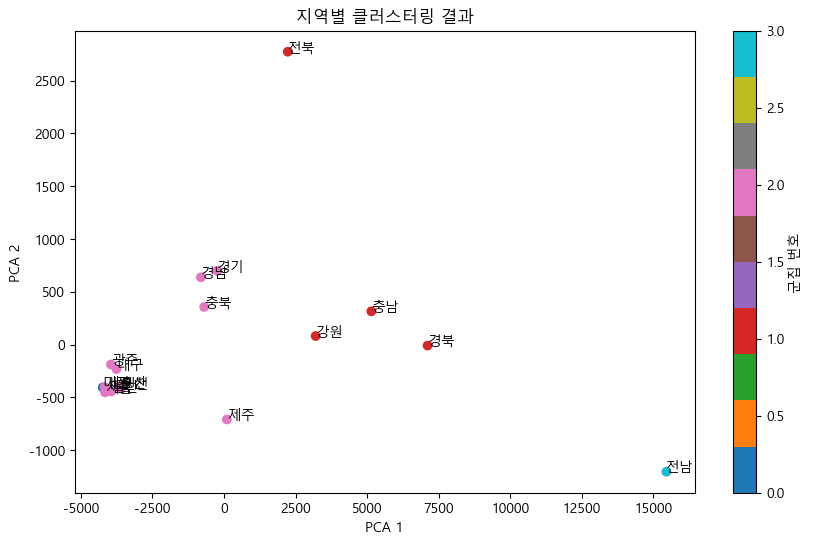

<Figure size 1500x800 with 0 Axes>

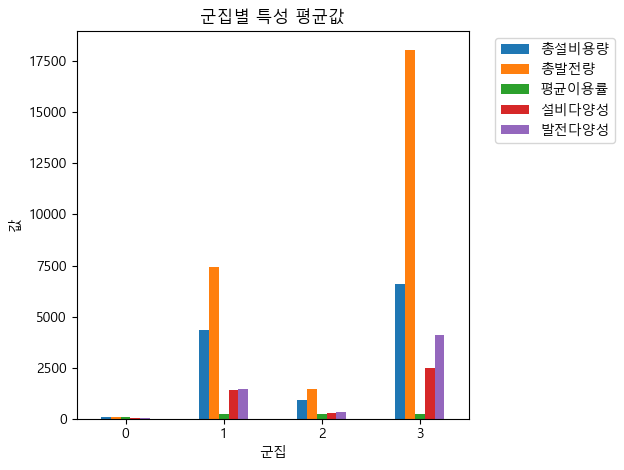


[군집별 특성 분석]
          총설비용량          총발전량       평균이용률        설비다양성        발전다양성
군집                                                                 
0     63.745410     86.235000   94.011587    25.975485    24.648630
1   4341.038516   7449.929250  247.534778  1390.327871  1458.473677
2    902.489488   1436.291273  241.144927   275.032826   307.286144
3   6599.961891  18061.147000  243.950713  2459.019012  4112.775641


In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. 데이터 준비
latest_year = df_gen['기간'].dt.year.max()

renewable_cols = ['태양광', '풍력', '수력', '해양', '바이오', '폐기물']
capacity_data = df_gen[df_gen['기간'].dt.year == latest_year].groupby('지역')[renewable_cols].mean()
generation_data = df_market[df_market['기간'].dt.year == latest_year].groupby('지역')[renewable_cols].sum()

# 2. 특성 생성 함수
def create_cluster_features(capacity_data, generation_data, efficiency):
    features = pd.DataFrame(index=capacity_data.index)
    features['총설비용량'] = capacity_data.sum(axis=1)
    features['총발전량'] = generation_data.sum(axis=1)
    features['평균이용률'] = efficiency.replace(0, np.nan).mean(axis=1).fillna(0)
    features['설비다양성'] = capacity_data.std(axis=1).fillna(0)
    features['발전다양성'] = generation_data.std(axis=1).fillna(0)
    return features.replace([np.inf, -np.inf], 0)

# 3. 클러스터링 실행
features = create_cluster_features(capacity_data, generation_data, efficiency)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled)

# 4. 결과 시각화 (PCA로 2차원 축소)
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10')

# 지역명 표시
for i, name in enumerate(features.index):
    plt.annotate(name, (reduced[i, 0], reduced[i, 1]))

plt.title("지역별 클러스터링 결과")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="군집 번호")
plt.show()

# 5. 군집별 특성 분석
def analyze_clusters(features, clusters):
    cluster_analysis = features.copy()
    cluster_analysis['군집'] = clusters
    cluster_means = cluster_analysis.groupby('군집').mean()
    
    # 군집별 특성 시각화
    plt.figure(figsize=(15, 8))
    cluster_means.plot(kind='bar')
    plt.title('군집별 특성 평균값')
    plt.xlabel('군집')
    plt.ylabel('값')
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return cluster_means

# 군집 특성 분석 결과 출력
cluster_analysis = analyze_clusters(features, clusters)
print("\n[군집별 특성 분석]")
print(cluster_analysis)


분석 결과:
군집별 지역 해석

군집 0 — 낮은 설비·낮은 발전, 낮은 이용률
+ 지역: 대전
+ 해석: 신재생에너지 관련 설비도 거의 없고, 발전도 매우 적음. 정책적 관심이나 인프라 부족 가능성.


군집 1 — 설비는 많지 않지만, 효율 매우 높음
+ 지역: 강원, 전북, 경북, 충남
+ 해석: 설비량은 중간이지만 이용률이 매우 높음. 설치된 설비를 매우 잘 활용하고 있다는 뜻. 효율 위주의 운영.

군집 2 — 전형적인 평균형
+ 지역: 서울, 부산, 인천, 경기, 대구, 울산, 세종, 광주, 충북, 경남, 제주
+ 해석: 설비와 발전량은 중간 정도지만, 효율은 높음. 다만 다양성은 낮아 특정 에너지원에 의존할 가능성이 있음. 도시 중심지가 다수 포함 → 에너지 인프라 균형 추구.

군집 3 — 설비와 발전 규모 모두 최고, 매우 다양한 에너지 구조
+ 지역: 전남
+ 해석: 전국에서 가장 활발한 신재생에너지 생산지. 설비도 크고 다양한 기술을 보유함. 정책, 입지 조건(예: 햇빛, 바람 등)이 모두 유리한 지역.